In [1]:
suppressMessages({

library(tidyverse)
library(admixr)

source("../R/utils.R")

})

In [2]:
library(devtools)
reload(inst("admixr"))

Reloading installed admixr


In [3]:
samples <- load_samples()

Warning message:
“Missing column names filled in: 'X12' [12], 'X13' [13], 'X14' [14], 'X15' [15], 'X16' [16], 'X17' [17], 'X18' [18], 'X19' [19], 'X20' [20], 'X21' [21], 'X22' [22], 'X23' [23], 'X24' [24]”

### Use two individual f4 statistics to calculate the f4 ratio of Nea. ancestry

In [104]:
EIGENSTRAT_DIR <- "../raw_data/eigenstrat_all//"
EIGENSTRAT <- paste0(EIGENSTRAT_DIR, "UPA_merged")

In [141]:
num <- qpDstat(W=c("UstIshim", filter(samples, pop == "WestEurasia")$name), X="Mbuti", Y="Altai", Z="Chimp",
               prefix=EIGENSTRAT, dir_name="../admixtools/", f4mode=TRUE)

In [142]:
den <- qpDstat(W="new_Vindija", X="Mbuti", Y="Altai", Z="Chimp",
               prefix=EIGENSTRAT, dir_name="../admixtools/", f4mode=TRUE)

In [155]:
f4a <- mutate(num, alpha=-Dstat/den$Dstat, name=W) %>% rename(admixtools_a=alpha)

### Merge this "manual" f4 ratio data.frame with the `qpF4ratio` results for the same setup

In [4]:
load("../RData//nea_estimates.RData")

In [156]:
f4b <- filter(all_nea_estimates, method == "qpF4ratio__Altai_new_Vindija_Mbuti_Chimp") %>% rename(admixtools_b=alpha)

In [160]:
f4_both <- inner_join(f4a, f4b, by="name")

### Plot the correlation of both

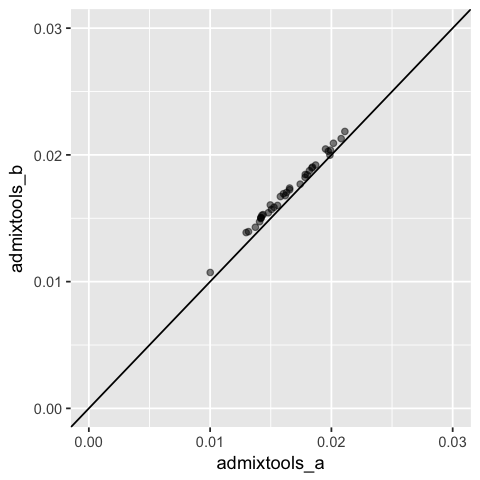

In [161]:
options(repr.plot.width=4, repr.plot.height=4)

ggplot(f4_both, aes(admixtools_a,  admixtools_b)) +
    geom_point(alpha=1/2) +
    geom_abline(slope=1) +
    coord_cartesian(x=c(0, 0.03), y=c(0, 0.03))

In [182]:
filter(steffi_df, set == "array", name %in% c("Vindija", "UstIshim") | pop == "WestEurasia", pop3 == "Altai") %>%
    arrange(pop) %>% head

name,pop2,pop3,abba,baba,f4,f4_ratio,se,z,denom_nean,set,age,pop
UstIshim,Mbuti,Altai,39397.17,41968.85,2571.688,0.02611873,0.004136340,6.314454,Vindija,array,45020,EMH
Abkhasian,Mbuti,Altai,39594.20,41564.91,1970.708,0.02001503,0.002945369,6.795423,Vindija,array,0,WestEurasia
Adygei,Mbuti,Altai,39248.77,41772.65,2523.875,0.02563313,0.003002335,8.537732,Vindija,array,0,WestEurasia
Albanian,Mbuti,Altai,39302.64,41933.28,2630.646,0.02671752,0.003505619,7.621343,Vindija,array,0,WestEurasia
Armenian,Mbuti,Altai,39514.94,41724.21,2209.271,0.02243793,0.002929233,7.660002,Vindija,array,0,WestEurasia
Basque,Mbuti,Altai,39533.30,41808.41,2275.104,0.02310655,0.003043811,7.591322,Vindija,array,0,WestEurasia


In [181]:
head(f4_both)

W,X,Y,Z,Dstat,Zscore,BABA,ABBA,n_snps,admixtools_a,name,age,pop,admixtools_b,method,snp_count,z
UstIshim,Mbuti,Altai,Chimp,0.001457,4.693,49423,47213,1516805,0.02016916,UstIshim,45020,EMH,0.020919,qpF4ratio__Altai_new_Vindija_Mbuti_Chimp,1637960,-4.827
Abkhasian,Mbuti,Altai,Chimp,0.001031,4.730,49163,47597,1520103,0.01427207,Abkhasian,0,WestEurasia,0.015231,qpF4ratio__Altai_new_Vindija_Mbuti_Chimp,1640938,-5.000
Adygei,Mbuti,Altai,Chimp,0.001439,6.474,49393,47204,1520084,0.01991999,Adygei,0,WestEurasia,0.020379,qpF4ratio__Altai_new_Vindija_Mbuti_Chimp,1627936,-6.566
Albanian,Mbuti,Altai,Chimp,0.001525,6.087,49647,47329,1519137,0.02111048,Albanian,0,WestEurasia,0.021848,qpF4ratio__Altai_new_Vindija_Mbuti_Chimp,1614719,-6.255
Armenian,Mbuti,Altai,Chimp,0.001301,5.580,49308,47332,1519689,0.01800966,Armenian,0,WestEurasia,0.018428,qpF4ratio__Altai_new_Vindija_Mbuti_Chimp,1223569,-5.674
Basque,Mbuti,Altai,Chimp,0.001288,5.667,49483,47525,1520091,0.01782970,Basque,0,WestEurasia,0.018225,qpF4ratio__Altai_new_Vindija_Mbuti_Chimp,1628040,-5.741


In [205]:
0.001458/-0.072239

[1] -0.020183

In [203]:
den

W,X,Y,Z,Dstat,Zscore,BABA,ABBA,n_snps
new_Vindija,Mbuti,Altai,Chimp,-0.072239,-100,20440,124203,1436387


In [200]:
filter(steffi_df, name == "Vindija")

name,pop2,pop3,abba,baba,f4,f4_ratio,se,z,denom_nean,set,age,pop
Vindija,Mbuti,Altai,20580.344,621759.1,601178.79,1,0,0,Vindija,all,NA,NA
Vindija,Mbuti,Altai,6632.854,105094.3,98461.44,1,0,0,Vindija,array,NA,NA


In [5]:
suppressMessages({

steffi_df <- bind_rows(list(
    read_table2("../raw_data/steffi/results_usti_test/f4_ratios") %>% mutate(set="all"),
    read_table2("../raw_data/steffi/results_usti_test_array/f4_ratios") %>% mutate(set="array")
    )) %>% 
    filter(pop3 == "Altai", pop2 == "Mbuti") %>% 
    mutate(pop1=ifelse(pop1 == "Ust_Ishim", "UstIshim", pop1)) %>% 
    left_join(samples, by=c("pop1"="name")) %>%
    rename(name=pop1)

})

steffi_nea <- steffi_df %>% select(name, f4_ratio, set, pop) %>% spread(set, f4_ratio) %>%
    rename(steffi_all=all, steffi_array=array)

In [6]:
steffi_nea %>% head

name,pop,steffi_all,steffi_array
Abkhasian,WestEurasia,0.01993022,0.02001503
Adygei,WestEurasia,0.02330924,0.02563313
Albanian,WestEurasia,0.02408386,0.02671752
Aleut,CentralAsiaSiberia,0.02523005,0.02532569
Altaian,CentralAsiaSiberia,0.02613542,0.02702200
Ami,EastAsia,0.02532708,0.02458556


In [7]:
direct <- all_nea_estimates %>%
    filter(method == "direct") %>%
    select(name, pop, martin_direct=alpha)

f4 <- all_nea_estimates %>%
    filter(method == "qpF4ratio__Altai_new_Vindija_Mbuti_Chimp") %>%
    select(name, pop, martin_admixtools=alpha)

In [8]:
merged <- inner_join(direct, f4) %>% inner_join(steffi_nea)

Joining, by = c("name", "pop")
Joining, by = c("name", "pop")


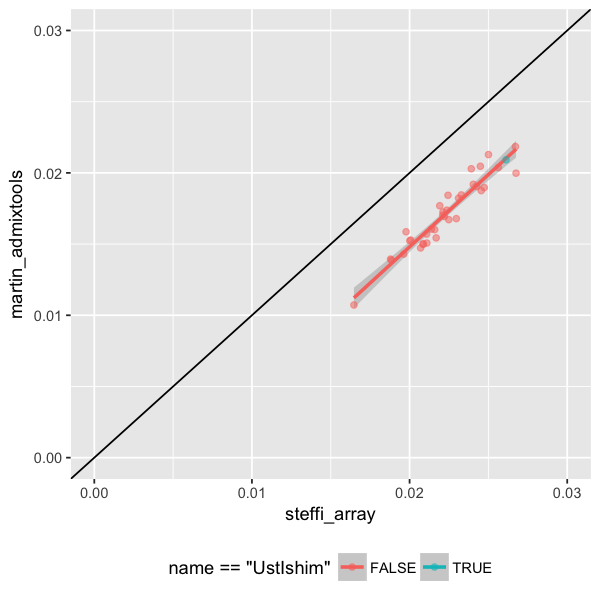

In [9]:
options(repr.plot.width=5, repr.plot.height=5, repr.plot.res=120)

# using Vindja
ggplot(filter(merged, name == "UstIshim" | pop == "WestEurasia"),
       aes(steffi_array, martin_admixtools, color=name == "UstIshim")) +
    geom_smooth(method="lm") +
    geom_point(alpha=1/2) +
    geom_abline(slope=1) +
    xlim(0, 0.03) + ylim(0, 0.03) +
    theme(legend.position="bottom")